# Highlighting the differences between HUNT3 and HUNT4

### Install and import required packages

In [1]:
%pip install --quiet -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
from models.hunt_data_loader import HuntDataLoader
import numpy as np

data_loader = HuntDataLoader()

### See the Size, values and mean of the dataset entries

First we make sure that there is an equal amount of Hunt3 (60yo) and Hunt4 (70yo) brain scans. We only use 100 entries when estimating average intensity to save time.

In [3]:
info = data_loader.get_data_info(max_entries=100)

Number of entries in HUNT3: 703
Number of entries in HUNT4: 703
Average intensity across Hunt3: 0.10296124348427753
Average intensity across Hunt4: 0.10225309420742373
Min shape across Hunt3: [193, 229, 193], Max shape across Hunt3: [193, 229, 193]
Min shape across Hunt4: [193, 229, 193], Max shape across Hunt4: [193, 229, 193]


### Load and see a random brain-scan pair

We select a random candidate from the closed dataset

In [4]:
hunt3, hunt4 = data_loader.get_random_pair(verbose=True)

h3 = data_loader.get_middle_slice(hunt3)
h4 = data_loader.get_middle_slice(hunt4)

Opening entry: 14081
14081 exists in both HUNT3 and HUNT4


We load both Brain Scan images (NIfTI files), get their fdata and display the center slice in the series

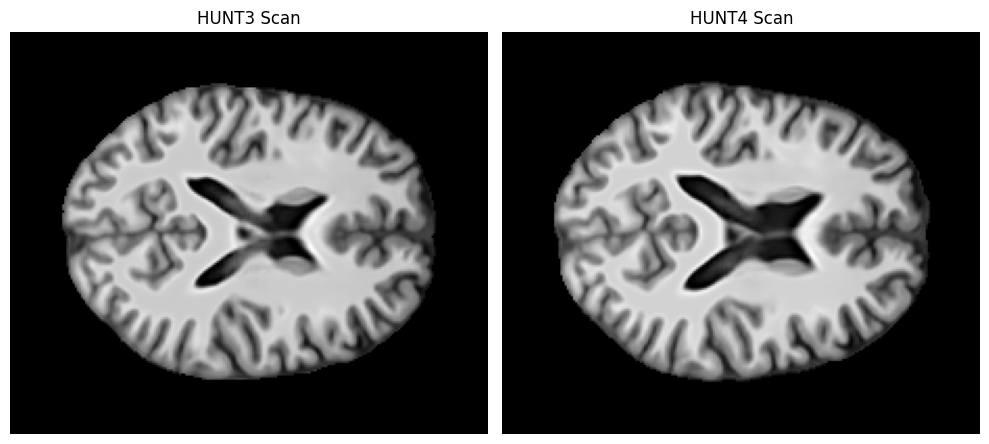

In [5]:
data_loader.display_slices(h3, h4)

## Differences

We now calculate the structural similarity of the two slices. This will show us how similar they are from 0-1, with 0 being totally different and 1 being the same image. As most of the picture is black and the brain doesn't change that much, we should expect a high number

In [6]:
print("Structural Similarity:", data_loader.structural_similarity(h3, h4))

Structural Similarity: 0.9291459674747441


### Highlighting the differences

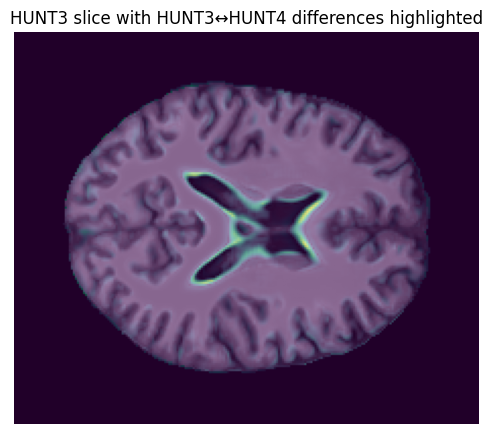

In [7]:
data_loader.display_slice_differences(h3, h4, hot=False)

### Displaying only the differences

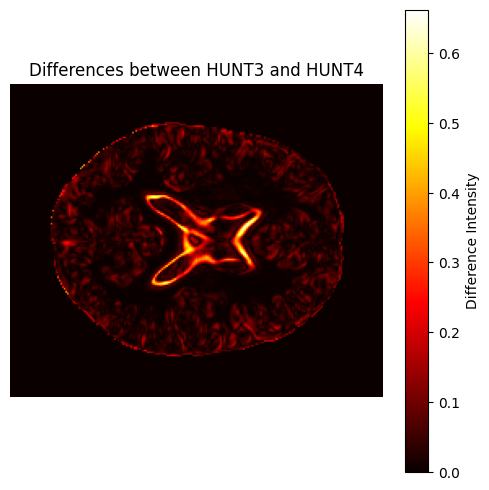

In [8]:
data_loader.display_slice_differences(h3, h4, hot=True)